
실제 분석 프로젝트에서 다루는 대부분의 데이터는 결측값이나 이상치가 없는 경우가 오히려 드물다

그렇기 때문에 데이터 탐색 단계에서 파악한 문제점들을 처리하는 과정이 필요하다

전체 데이터의 양이 매우 크고 결측값의 비중이 1% 미만으로 매우 작다면 이를 무시하고 분석을 해도 무방하다

하지만 대부분의 데이터는 상당량의 결함을 가지고 있다

결측값 처리 방법을 정하기 전에 데이터 탐색을 통해 결측값의 비율이 어떻게 되는지, 한 변수에 결측값이 몰려

있지는 않은지 등을 파악해야 한다

그리고 어떤 경우에는 빈 문자열이 입력되어 있어서 결측값으로 인식되지 않을 수도 있으므로 꼭 확인해야 한다



---



결측값은 분석 환경에 따라 '.', 'NA', "NaN' 등으로 표시되며 특성에 따라 세가지로 분류된다

완전 무작위 데이터 결측

이름 그대로 순수하게 결측값이 무작위로 발생한 경우를 뜻한다

이런 경우는 결측값을 포함한 데이터를 제거해도 편향이 거의 발생되지 않는다

무작위 결측

다른 변수의 특성에 의해 해당 변수의 결측치가 체계적으로 발생한 경우를 뜻한다

비무작위 결측

결측값들이 해당 변수 자체의 특성을 갖고 있는 경우

실제로 무엇인지 확인할 수 없으므로 비무작위 결측을 구분하는 것은 어렵다

가장 간단한 결측값 처리 방법은 결측값이 심하게 많은 변수를 제거하거나 결측값이 포함된 행을 제거하고

데이터 분석을 하는 표본제거 방법을 사용하는 것이다

전체 데이터에서 결측값 비율이 10% 미만일 경우 이 방법을 사용하는 경우가 많다

하지만 실무에서 사용하는 데이터는 생각보다 높은 비율의 결측값이 있는 경우가 많다

이런 경우 결측값을 무시하면 데이터가 편향될 위험이 있다





---



표본제거 방법 이외에 가장 널리 알려진 방법으로 평균 대치법이 있다

결측값을 제외한 온전한 값들의 평균을 구한 다음, 그 평균값을 결측값들에 대치하는 것이다

유사한 방법으로 최빈값, 중앙값, 최댓값, 최솟값 대치도 있다

이 방법들은 표본제거 방법의 단점을 어느 정도 보완해 줄 수 있다는 장점이 있다

하지만 평균을 사용하기 때문에 통계량의 표준 오차가 왜곡되어 축소되어 나타나고,

따라서 p-value가 부정확하게 된다

그래서 표본제거방법과 평균 대치법은 완전 무작위 결측이 아닌 경우 적절하지 않은 방법이다



---



데이터가 시계열적 특성을 가지고 있을 때는 보간법을 사용하는 것이 효과적이다

인덱스 간격이 불규칙하거나 결측값이 두 번 이상 연달아 있을 때는 선형적인 수치 값을 계산해 보간하는

방법을 사용한다

이를 위해서는 우선 데이터를 시간 순으로 정렬해야 한다

단순하게 평균값 등을 대치하는 것에서 더 나아가 해당 변수와 다른 변수 사이의 관계성을 고려하여

결측값을 계산하면 보다 합리적으로 결측값 처리할 수 있다

회귀식을 이용하여 결측값을 추정하는 회귀대치법이 있다





---



회귀대치는 추정하고자 하는 결측값을 가진 변수를 종속변수로 하고, 나머지 변수를 독립 변수로 하여 추정한

회귀식을 통해 결측값을 대치하는 것이다

단순하게 평균값으로 대치하는 평균대치법과는 달리 회귀식을 통해 독립변수의 조건부 평균으로 결측값을 대치하기

때문에 더욱 발전된 방법으로 생각되지만 이 경우에도 결측된 변수의 분산을 과소 추정하는 문제를 가지고 있다

이를 해결하기 위해 인위적으로 회귀식에 확률 오차항을 추가하는 확률적 회귀대치법을 사용하여 변동성을

조정하기도 한다

즉 관측된 값들을 변동성만큼 결측값에도 같은 변동성을 추가해 주는 것이다

하지만 이 방법도 여전히 어느정도 표본 오차를 과소추정하는 문제를 가지고 있다



---



이러한 과소 추정 문제를 해결하기 위해 최근 많이 사용되는 방법이 다중 대치법이다

단순대치를 여러 번 수행하여 n개의 가상적 데이터를 생성하여 이들의 평균으로 대치하는 방법을

다음 3가지 단계로 구분할 수 있다

대치단계

가능한 대치 값의 분포에서 추출된 서로 다른 값으로 결측치를 처리한 n개의 데이터셋 생성



분석 단계

생성된 각각의 데이터셋을 분석하여 모수의 추정치와 표준오차 계산

결합 단계

계산된 각 데이터셋의 추정치와 표준오차를 결합하여 최종 결측 대치값 산출



---



결측값 처리 실습

1. 패키지 설치

In [1]:
!pip install missingno

2. 패키지 임포트

In [2]:
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

3. 데이터 불러오기 및 확인

In [3]:
df = pd.read_csv('/content/bike_sharing_daily.csv')

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600


4. 각 칼럼의 속성 및 결측값 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        714 non-null    float64
 10  atemp       707 non-null    float64
 11  hum         706 non-null    float64
 12  windspeed   718 non-null    float64
 13  casual      720 non-null    float64
 14  registered  720 non-null    float64
 15  cnt         731 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 91.5+ KB


info() 함수는 결측값이 아닌 수를 나타내므로 정확한 결측값이 얼마나 되는지 확인하기

어렵다

In [5]:
df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

isnull().sum()을 사용하면 칼럼별로 몇 개의 결측값이 있는지 확인할 수 있다

5. 각 칼럼의 결측값 시각화

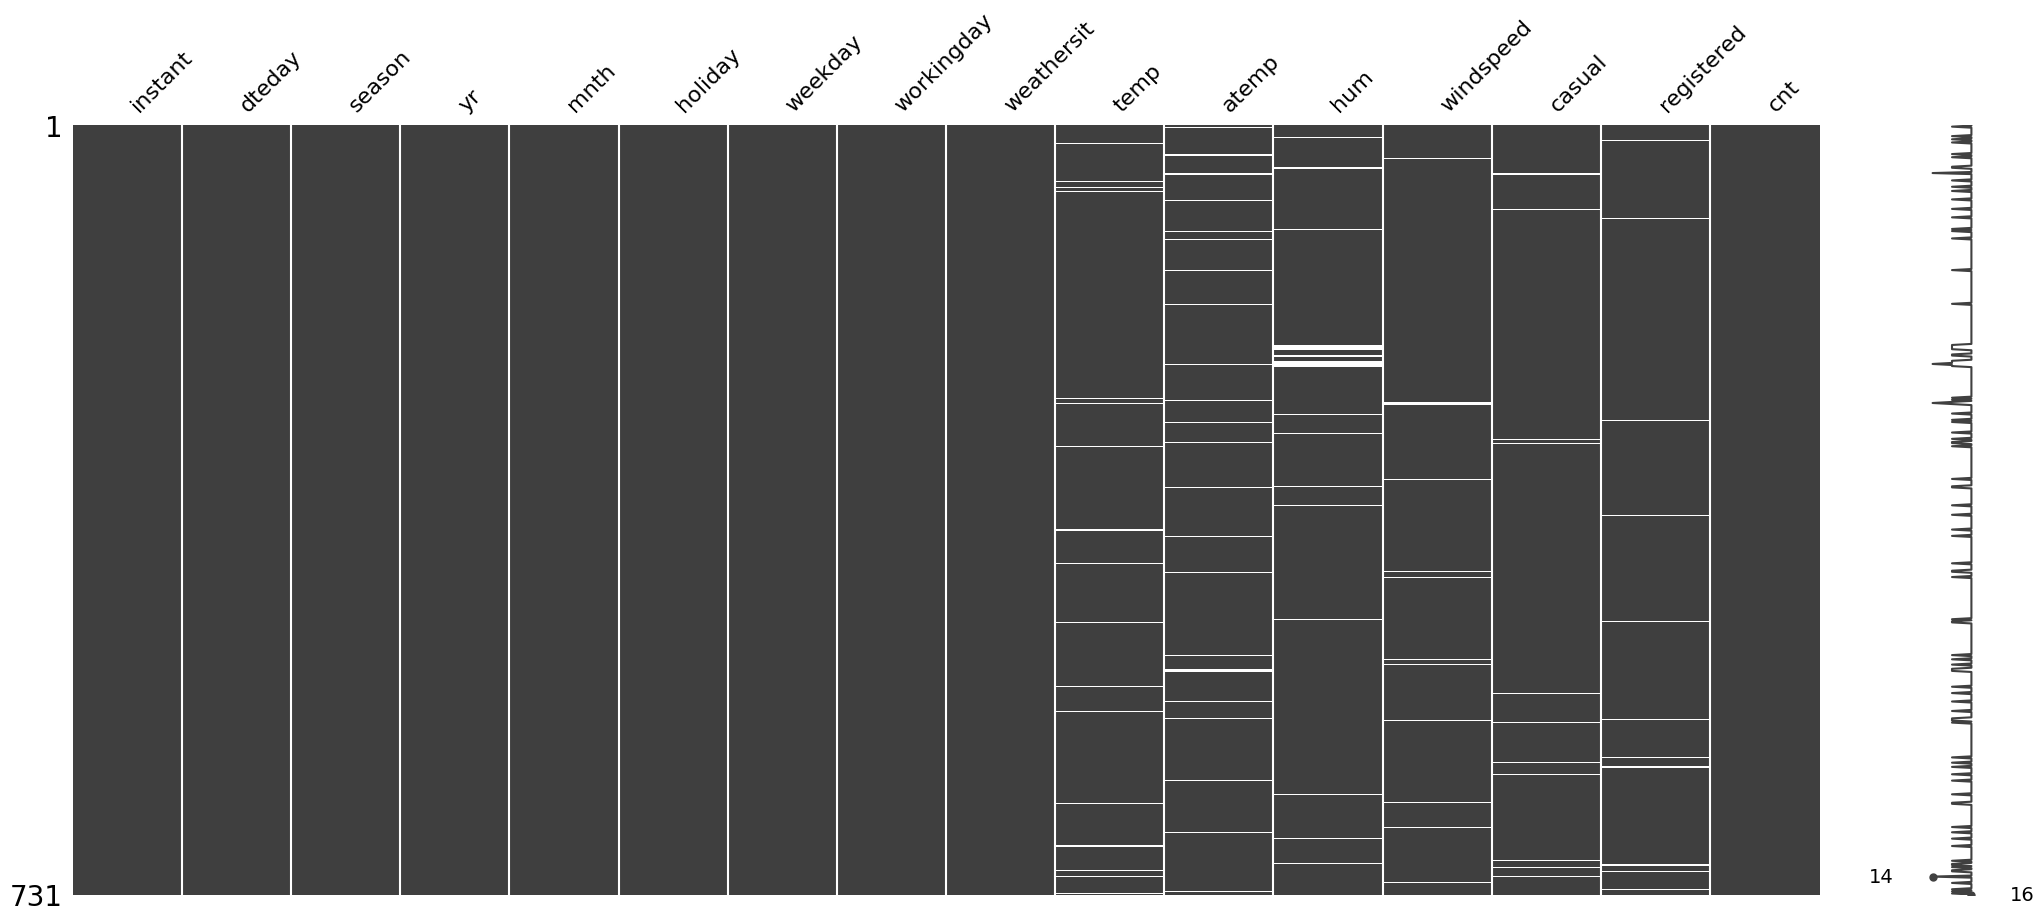

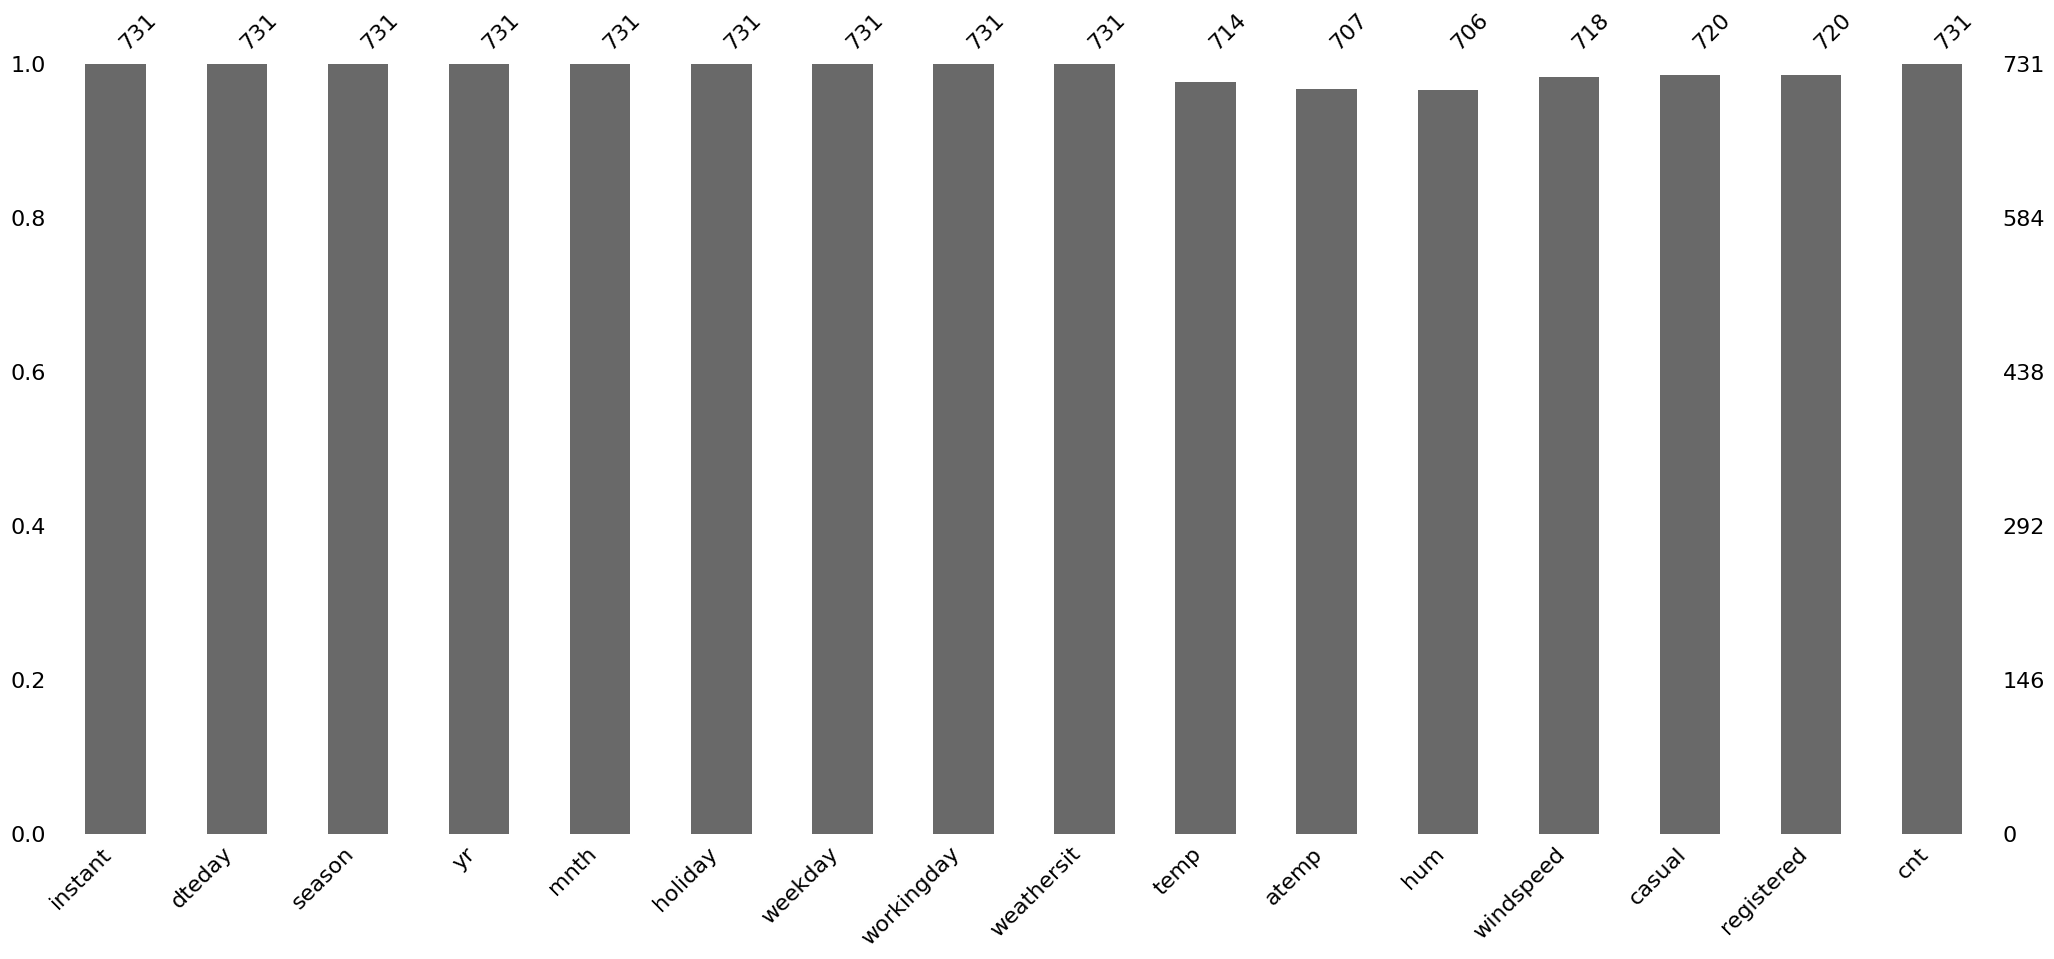

In [6]:
# 결측값 영역 표시
msno.matrix(df)
plt.show()

# 결측값 막대그래프
msno.bar(df)
plt.show()

6. 빈 문자열 포함 여부 확인(결측값이 아닌 빈 문자열이 있는지 여부)

In [7]:
def is_emptystring(x):
    return x.eq('').any()

df.apply(lambda x: is_emptystring(x))

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

없다

7-1 결측값 표본 제거

In [8]:
# 모든 칼럼이 결측값인 행 제거
df_drop_all = df.dropna(how='all')

# 세 개 이상의 칼럼이 결측값인 행 제거
df_drop_3 = df.dropna(thresh=3)

# 특정 칼럼(temp)이 결측값인 행 제거
df_drop_slt = df.dropna(subset=['temp'])

# 한 칼럼이라도 결측치가 있는 행 제거
df_drop_any = df.dropna(how = 'any')

df_drop_any.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

7-2 특정값, 평균값, 중앙값, 최빈값 등 대치

In [ ]:
# 특정값(0)으로 대치 - 전체 칼럼
df_0_all = df.fillna(0)

# 특정값(0)으로 대치 - 칼럼 지정
df_0_slt = df.fillna({'temp':0})

# 평균값 대치 - 전체 칼럼
df_mean_all = df.fillna(df.mean())

# 평균값 대치 - 칼럼 지정
df_mean_slt = df.fillna({'temp':df['temp'].mean()})

# 중앙값 대치 - 전체 칼럼
df_median_all = df.fillna(df.median())

# 중앙값 대치 - 칼럼 지정
df_median_slt = df.fillna({'temp':df['temp'].median()})

# 최빈값 대치 - 전체 칼럼
df_mode_all = df.fillna(df.mode())

# 최빈값 대치 - 특정 칼럼
df_mode_slt = df.fillna({'temp':df['temp'].mode()})

# 최댓값 대치 - 전체 칼럼
df_max_all = df.fillna(df.max())

# 최댓값 대치 - 특정 칼럼
df_max_slt = df.fillna({'temp':df['temp'].max()})

# 최솟값 대치 - 전체 칼럼
df_min_all = df.fillna(df.min())

# 최솟값 대치 - 특정 칼럼
df_min_slt = df.fillna({'temp':df['temp'].min()})

7-3 보간법 적용 대치

In [10]:
# 전 시점 값으로 대치 - 칼럼 지정
df1 = df.copy()
df1['temp'].fillna(method='pad', inplace = True)

# 뒤 시점 값으로 대치 - 전체 칼럼
df.fillna(method='bfill')

# 뒤 시점 값으로 대치 - 결측값 연속 한 번만 대치
df.fillna(method = 'bfill', limit = 1)

# 보간법 함수 사용하여 대치 - 단순 순서 방식
ts_intp_linear = df.interpolate(method='values')

# 보간법 함수 사용하여 대치 - 시점 인덱스 사용

    # dteday 칼럼 시계열 객체 변환
df['dteday'] = pd.to_datetime(df['dteday'])

    # dteday 칼럼 인덱스 변경
df_i = df.set_index('dteday')

    # 시점에 따른 보간법 적용
df_time = df_i.interpolate(method='time')

df_time.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

시점 인덱스를 사용하기 위해서는 우선 시간형 칼럼을 시계열 객체로 변환한 후에 인덱스로

설정해줘야한다.

그 다음 interpolate()함수를 사용하여 시점의 정도를 고려한 대치값을 적용해준다

7-4 다중대치법 적용

In [12]:
# dteday 칼럼 제거
df_dp = df.drop(['dteday'], axis = 1)

# 다중 대치 알고리즘 설정
imputer = IterativeImputer(imputation_order = 'ascending',
                           max_iter = 10, random_state = 42,
                           n_nearest_features=5)

# 다중 대치 적용
df_imputed = imputer.fit_transform(df_dp)

# 판다스 변환 및 칼럼 설정
df_imputed = pd.DataFrame(df_imputed)

df_imputed.columns = ['instant', 'season', 'yr', 'mnth', 'holiday',
                      'weekday', 'workingday', 'weathersit', 'temp',
                      'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

df_imputed.isnull().sum()

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

다중 대치를 적용할 때는 넘파이 배열로 변환되기 때문에 다시 판다스 데이터프레임으로

변환해 준다